In [1]:
import matplotlib.pyplot as plt
import numpy as np

from scipy.optimize import minimize
%matplotlib inline

## Задание 1

In [2]:
raitings = np.array([[ 4,  4,  9,  4,  1,  6, 10,  7,  9,  6,  9,  2,  8,  6,  6],
                     [ 9,  2,  5, 10,  7,  8, 10,  5,  6,  2,  1,  6,  8,  9,  7],
                     [ 1,  6,  8,  8,  4,  9,  3,  8, 10,  5,  2,  6,  8,  1,  6],
                     [ 6,  1,  9,  7,  7,  9,  2,  3,  5,  1,  6,  6,  3,  2,  7],
                     [ 3,  7,  3,  5,  7,  9,  9,  6,  2,  9,  1,  2,  8, 10,  6],
                     [ 8,  3,  7,  3,  8,  6,  1,  8,  8,  6,  1,  9,  4, 10,  1],
                     [ 9,  8,  4,  8,  8, 10,  6,  1,  1,  2,  9,  5,  2,  7,  2],
                     [ 4,  1,  6,  4,  3, 10,  4,  4,  2,  8,  7,  9,  3,  8,  3],
                     [ 2,  7,  7,  6, 10,  6,  8,  9,  8,  6, 10,  1,  7, 10,  4],
                     [ 5, 10,  8,  8,  9,  7,  2,  9,  9, 10,  8,  8,  8,  6, 10]])

## A

In [269]:
from sklearn.metrics import pairwise_distances

In [369]:
# distances_ = pairwise_distances( raitings, metric = 'cosine' ,  n_jobs = None , force_all_finite = True  )

# for i, users_num in enumerate(distances_):
#     min_index, min_value = min(enumerate(users_num), key=lambda x: x[1] if x[1] != 0 else float('Inf'))
#     print(i,min_index)
    
for i, users_num in enumerate(pairwise_distances(raitings, metric="cosine")):
    print(i, list(users_num).index(np.min(users_num[np.nonzero(users_num)])))

0 8
1 4
2 9
3 9
4 8
5 9
6 3
7 5
8 0
9 2


In [50]:
# def cosine( a, b ):
#     """
#     Подсчет косинуса угла между векторами a, b по их координатам
#     """
    
#     # длины векторов
#     aLength = np.linalg.norm( a )
#     bLength = np.linalg.norm( b )
    
#     return np.dot( a, b ) / ( aLength * bLength )

In [87]:
# max_users = {};


# for i, users_num in enumerate(raitings):
#     max_users[i] = 0
#     for i_1, users_num_1 in enumerate(raitings):
#         if i != i_1:
#             users_res = cosine(users_num, raitings[i_1])
#             if max_users[i] < users_res:
#                 max_users[i] = i_1

# print(max_users)

{0: 1, 1: 2, 2: 1, 3: 1, 4: 1, 5: 1, 6: 1, 7: 1, 8: 1, 9: 1}


## B

In [111]:
from sklearn.decomposition import IncrementalPCA
from sklearn.metrics import mean_squared_error

In [339]:
X = raitings
pca = PCA(n_components=5)
pca.fit(X)
pca.fit_transform(X)

array([[-5.30986101,  1.92919845, -4.93300027,  2.70188013,  5.50497886],
       [ 2.87763403,  2.71659559,  1.40592782,  7.26325751, -4.50322291],
       [-4.94010408, -6.68861167, -0.94550184,  3.61556661, -0.68969272],
       [ 5.14939908, -6.28027284, -4.65978558,  1.09024004, -1.01471112],
       [-1.37488691,  7.54357985,  4.00834369,  2.1284001 , -0.16324949],
       [ 2.65341956, -3.77075601,  8.58430748, -1.46628319,  1.67401769],
       [ 8.61573944,  3.78603335, -4.02721027, -4.37582577, -3.13880277],
       [ 5.39658258, -1.0170466 ,  1.01456742, -1.89512837,  6.54883538],
       [-5.7843488 ,  5.29857107, -1.48083611, -3.71295542,  0.21312695],
       [-7.2835739 , -3.51729118,  1.03318766, -5.34915166, -4.43127987]])

## Задание 2

Вычислите производную $tg^2(sin(x) + cos(2x+3))$

In [166]:
from sympy import *
import math

In [361]:
from scipy.misc import derivative

In [364]:
x = symbols('x')  

def  f ( x ): 
    return tan(sin(x) + cos(2*x + 3))**2

derivative( f , 1.0 ,  n = 1 )

57.0653126946030

## Задание 3

In [175]:
def f(x, a, b):
    return np.e**a * np.sin(b*x) + x

In [176]:
x = np.array([0.        , 0.26315789, 0.52631579, 0.78947368, 1.05263158,
              1.31578947, 1.57894737, 1.84210526, 2.10526316, 2.36842105,
              2.63157895, 2.89473684, 3.15789474, 3.42105263, 3.68421053,
              3.94736842, 4.21052632, 4.47368421, 4.73684211, 5.        ])

In [177]:
fx = np.array([  0.        , -12.01819092, -18.90968634, -17.68786571,
                -8.7529108 ,   4.27524517,  16.06801336,  21.81250213,
                19.22059845,   9.48411207,  -3.22273056, -13.48576488,
               -16.91096359, -11.95866834,  -0.58630088,  12.56873816,
                22.12489421,  24.20292139,  18.04522521,   6.33211092])

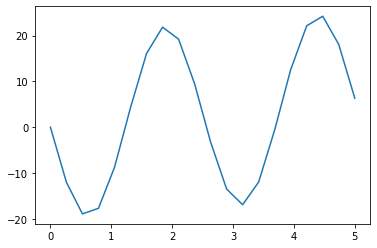

In [178]:
plt.plot(x, fx)
plt.show()

In [179]:
def error(params):
    return np.sum(np.abs(fx - f(x, params[0], params[1])))

In [234]:
from scipy.optimize import minimize

In [243]:
res = minimize(error, np.array([0, 0]), method='COBYLA')
res

     fun: 0.07674566111565184
   maxcv: 0.0
 message: 'Optimization terminated successfully.'
    nfev: 135
  status: 1
 success: True
       x: array([ 3.00018796, -2.50008926])

In [244]:
res.x

array([ 3.00018796, -2.50008926])

## Задание 4

In [287]:
means = []
p = 1000

for i in range(p):
    means.append(np.random.randint(0, 20, 50).mean())

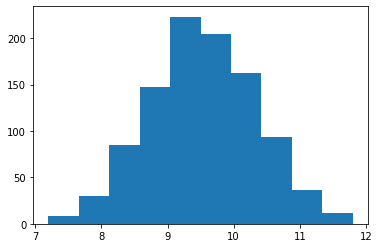

In [288]:
plt.hist(means)
plt.show()

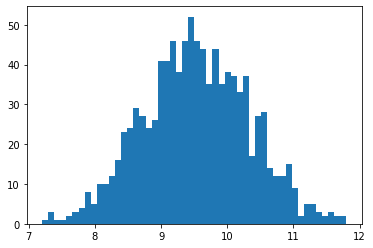

In [289]:
plt.hist(means, 50)
plt.show()

## Задание 5

In [264]:
m = np.array([[1, 4],
              [1, 1]])
print(m)

[[1 4]
 [1 1]]


In [265]:
from numpy import linalg as LA

In [266]:
w,v = LA.eig(m)

In [267]:
w

array([ 3., -1.])

In [268]:
v

array([[ 0.89442719, -0.89442719],
       [ 0.4472136 ,  0.4472136 ]])